In [1]:
from sklearn.datasets import load_boston
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df = pd.read_csv('water.csv')

In [4]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


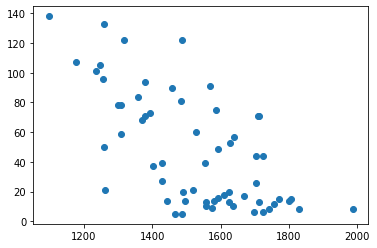

In [6]:
plt.scatter(df['mortality'],df['hardness'])

# коэффициенты корреляции Пирсона и Спирмена

In [16]:
df[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [17]:
df[['mortality','hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


# модель линейной регрессии


In [18]:
from sklearn.linear_model import LinearRegression

In [28]:
X = df[['mortality']].values
Y = df['hardness'].values

In [29]:
model = LinearRegression()

In [39]:
model.fit(X,Y)
model.score(X,Y) #коэф детерминации 

0.4288267193124973

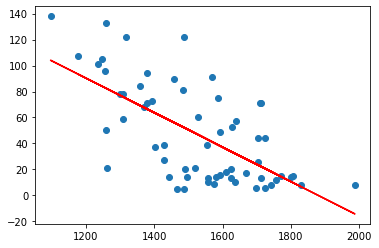

In [38]:
plt.scatter(df['mortality'],df['hardness'])
plt.plot(df['mortality'], model.predict(df[['mortality']]), c='r')

In [40]:
import statsmodels.api as sm

In [41]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [42]:
X = sm.add_constant(X)

In [43]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Fri, 10 Sep 2021   Prob (F-statistic):           1.03e-08
Time:                        18:15:29   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

In [44]:
print('parameters: ', results.params)
print('R2: ',results.rsquared)

parameters:  [ 2.49776928e+02 -1.32924533e-01]
R2:  0.42882671931249716


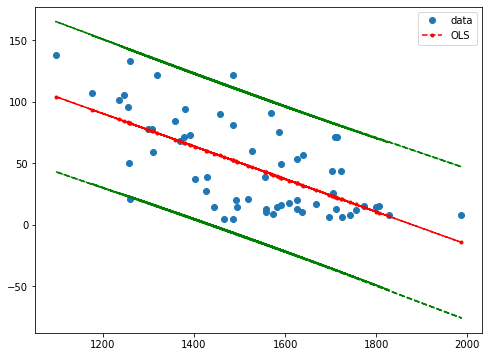

In [45]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

# график остатков

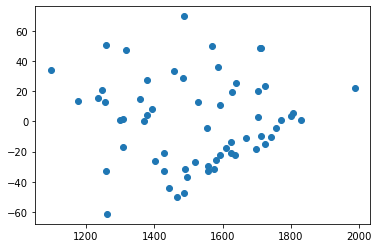

In [46]:
plt.scatter(X[:, 1], results.resid)

(array([ 2.,  3., 11., 10.,  9.,  9.,  8.,  3.,  5.,  1.]),
 array([-61.29201633, -48.18792189, -35.08382745, -21.97973301,
         -8.87563857,   4.22845587,  17.33255031,  30.43664475,
         43.54073919,  56.64483363,  69.74892807]),
 <a list of 10 Patch objects>)

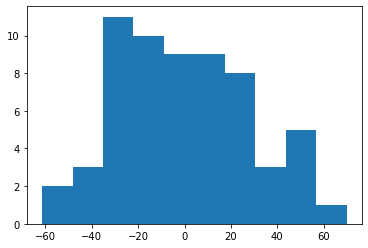

In [47]:
plt.hist(results.resid)